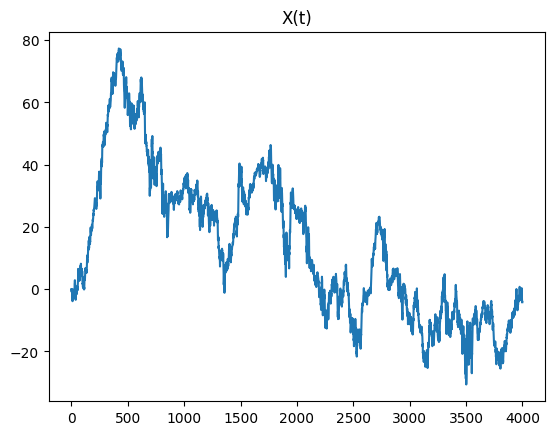

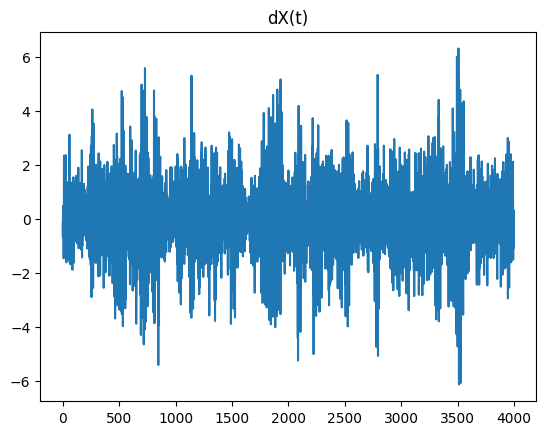

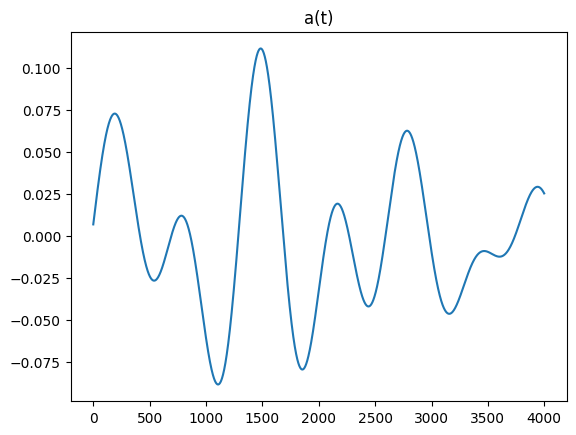

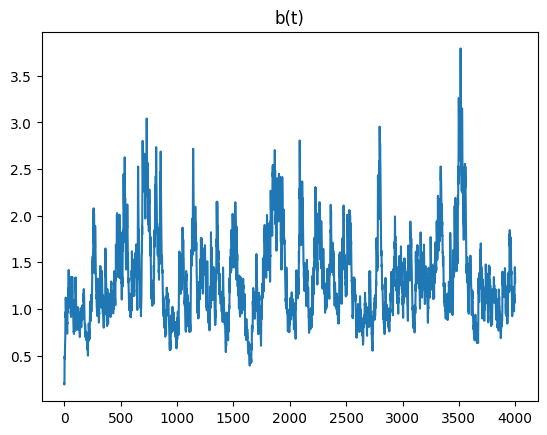

In [1]:
from sem.generate_series import create_sde_process
from sem.sem.mixture_sem import MixtureSEM
import matplotlib.pyplot as plt
import torch
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(seed)



num_components = 5
length = 4000

series_dct = create_sde_process(length, n_components=num_components)
series = series_dct['X']
deltas = series[1:] - series[:-1]
a_trafaret = series_dct['a_t']
b_trafaret = series_dct['b_t']
plt.plot(series)
plt.title('X(t)')
plt.show()
plt.plot(deltas)
plt.title('dX(t)')
plt.show()
plt.plot(a_trafaret)
plt.title('a(t)')
plt.show()
plt.plot(b_trafaret)
plt.title('b(t)')
plt.show()

In [2]:
sem = MixtureSEM(deltas, 'exp', n_components=3, N_init=5, alpha=0.8, comp_distr='student', exp_smooth=0.6, prior_strength=1.0, tol=1e-4, device="cuda")
g_ik, p_k, a_k, b_k = sem.find_params()

N = 5; Max ACF(1): 0.9999999403953552
N = 10; Max ACF(1): 0.9675994515419006
N = 15; Max ACF(1): 0.9229303598403931
N = 20; Max ACF(1): 0.909864068031311
N = 25; Max ACF(1): 0.8780659437179565
N = 30; Max ACF(1): 0.8668965697288513
N = 35; Max ACF(1): 0.860132098197937
N = 40; Max ACF(1): 0.8530821800231934
N = 45; Max ACF(1): 0.847168505191803
N = 50; Max ACF(1): 0.8394033908843994
N = 55; Max ACF(1): 0.8399832844734192
N = 60; Max ACF(1): 0.8218846917152405
N = 65; Max ACF(1): 0.8199627995491028
N = 70; Max ACF(1): 0.8119117617607117
N = 75; Max ACF(1): 0.809200644493103
N = 80; Max ACF(1): 0.8117722868919373
N = 85; Max ACF(1): 0.8074469566345215
N = 90; Max ACF(1): 0.8019543886184692
N = 95; Max ACF(1): 0.7929076552391052
Found window length: 95


In [3]:
# x_modal = torch.cumsum(modes, 0) + series[sem.series_length]
# x_median = torch.cumsum(percentiles_t[:, 49], 0) + series[sem.series_length]
# x_mean = torch.cumsum(torch.sum((sem.p * sem.a).cpu(), 1), 0) + series[sem.series_length]

In [4]:
sorter = torch.argsort(a_k, dim=-1)

idx = torch.meshgrid(
    *[torch.arange(dim) for dim in a_k.shape[:-1]],
    indexing='ij'
)
idx = list(idx)
idx.append(sorter)

a_k_sorted = a_k[idx[0].unsqueeze(-1), idx[1]].cpu()
b_k_sorted = b_k[idx[0].unsqueeze(-1), idx[1]].cpu()

print(b_k.shape)

torch.Size([3905, 3])


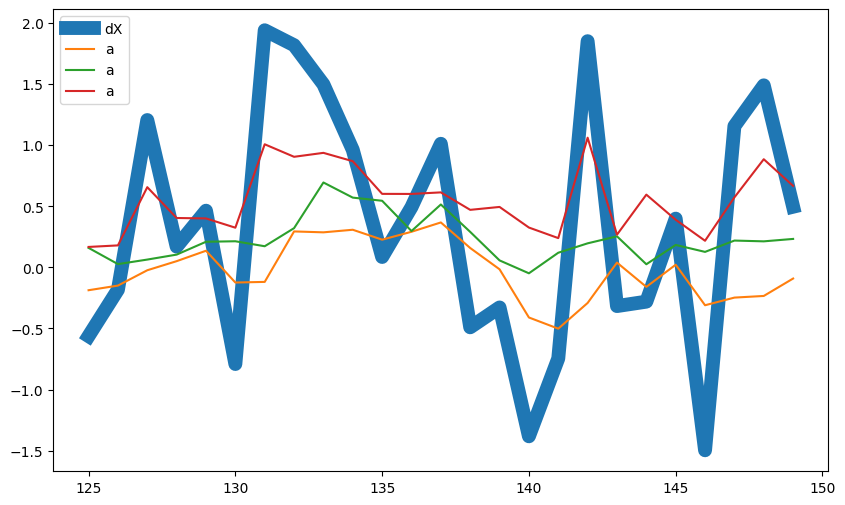

In [5]:
plt.figure(figsize=(10, 6))
i = 125
plt.plot(range(i, i+25), deltas[sem.series_length-1 + 125:sem.series_length-1 + 150], label='dX', linewidth=10)
plt.plot(range(i, i+25), a_k_sorted[125:150], label="a")
plt.legend()
plt.show()

In [6]:
a_k_sorted[125:150], torch.tensor(deltas[sem.series_length-1 + 125:sem.series_length-1 + 150]).unsqueeze(1), b_k_sorted[125:150]

(tensor([[-0.1872,  0.1595,  0.1672],
         [-0.1492,  0.0266,  0.1798],
         [-0.0237,  0.0638,  0.6565],
         [ 0.0508,  0.1044,  0.4042],
         [ 0.1360,  0.2096,  0.4007],
         [-0.1241,  0.2137,  0.3248],
         [-0.1190,  0.1729,  1.0077],
         [ 0.2942,  0.3210,  0.9053],
         [ 0.2868,  0.6949,  0.9375],
         [ 0.3079,  0.5710,  0.8692],
         [ 0.2267,  0.5452,  0.6017],
         [ 0.2914,  0.2973,  0.6011],
         [ 0.3677,  0.5148,  0.6139],
         [ 0.1585,  0.2905,  0.4709],
         [-0.0158,  0.0570,  0.4947],
         [-0.4104, -0.0486,  0.3260],
         [-0.5019,  0.1198,  0.2395],
         [-0.2914,  0.1968,  1.0616],
         [ 0.0390,  0.2541,  0.2675],
         [-0.1597,  0.0255,  0.5954],
         [ 0.0216,  0.1835,  0.3897],
         [-0.3102,  0.1267,  0.2178],
         [-0.2475,  0.2194,  0.5731],
         [-0.2341,  0.2130,  0.8853],
         [-0.0915,  0.2328,  0.6669]]),
 tensor([[-0.5626],
         [-0.1829],
        

ValueError: x and y must have same first dimension, but have shapes (200,) and (197,)

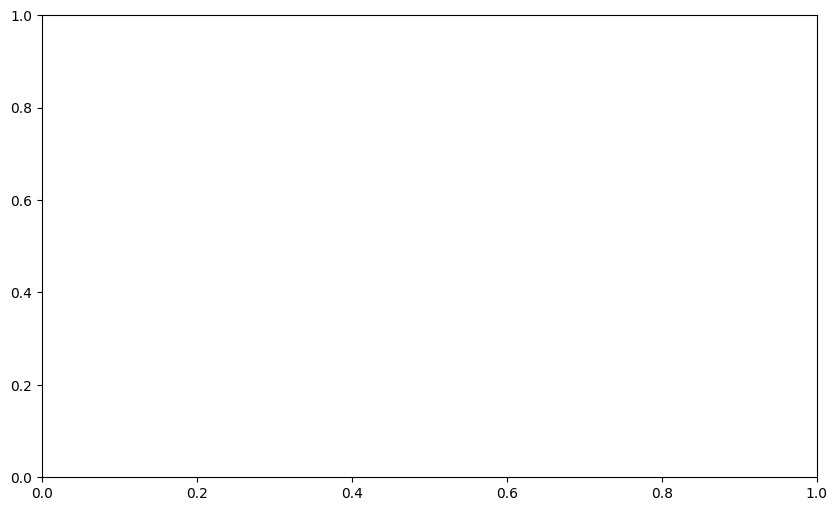

In [7]:
%matplotlib inline
from IPython.display import clear_output
import matplotlib.pyplot as plt

for i in range(0, 100000 - 200, 4):
    clear_output(wait=True)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(i, i+200), deltas[sem.series_length-1 + i:sem.series_length-1 + i + 200], label='X')
    plt.plot(range(i, i+200), a_k_sorted[i:i+200], label="0.50 персентиль")
    plt.legend()
    plt.show()